In [1]:
import json 
import torch
import torchvision
from torch import nn

from tqdm.auto import tqdm
from utils import buit_eval_model, load_json, clear_folder, split_json, judge
import os
from model import MAE
import numpy as np
from utils_cam import web_cam, node_json, visualize
model_path = 'D:\google drive\MAE Bs PJ\state_dict\epoch 3-4200 weight.pt'
CHECKPOINT_PATH = 'checkpoint.tar'

checkpoint = torch.load(CHECKPOINT_PATH)
step = checkpoint['step']
mean = checkpoint['mean']
std = checkpoint['std']
sample_num = 100
model = buit_eval_model(model_path)
import moviepy.editor as mpe

In [9]:
jsonFile = open(r'D:\Project Sekai\cos similarity\dataset\record\nodes.json','r')
x = json.load(jsonFile)

In [11]:
x[0]

[[386, 277],
 [387, 248],
 [378, 222],
 [362, 208],
 [345, 204],
 [384, 206],
 [372, 181],
 [359, 166],
 [347, 157],
 [376, 212],
 [345, 202],
 [345, 213],
 [354, 218],
 [366, 221],
 [337, 214],
 [339, 224],
 [347, 227],
 [354, 232],
 [331, 227],
 [334, 234],
 [342, 239],
 [264, 251],
 [270, 234],
 [285, 216],
 [302, 211],
 [314, 211],
 [287, 195],
 [306, 172],
 [319, 157],
 [328, 145],
 [290, 201],
 [320, 208],
 [317, 219],
 [308, 222],
 [293, 211],
 [322, 218],
 [316, 228],
 [307, 229],
 [297, 223],
 [321, 228],
 [316, 236],
 [307, 239]]

In [12]:
class_name = 'record'
clear_folder(rf'dataset\{class_name}\{class_name}')
save_folder = os.path.join('dataset', class_name)

In [13]:
input_video = os.path.join(save_folder, f'test (8).mp4')
# input_video = r"C:\Users\Huang\Desktop\output_video.mp4"
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark_sp.json')
output_folder = os.path.join(save_folder, class_name)
os.makedirs(save_folder, exist_ok=True)
json_path = rf'dataset\{class_name}\{class_name}\segment_{0}.json'

node_json(input_video, save_folder ,show=True)
split_json(input_json, output_folder, time_mark_path)
visualize(json_path)

60 61
(60, 42, 2)
(64, 42, 2) (64, 42, 2)


In [6]:
from utils import cosine_similarity
import matplotlib.pyplot as plt
import json
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] # 修改中文字體
plt.rcParams['axes.unicode_minus'] = False # 顯示負號

def sort(array1, array2):
    pair = []
    paired_arrays = list(zip(array1, array2))
    sorted_arrays = sorted(paired_arrays, key=lambda x: x[0], reverse=True)
    sorted_array1, sorted_array2 = zip(*sorted_arrays)

    for item in zip(sorted_array1, sorted_array2):
        pair.append(item)
    return pair

def show_boxplot(x, labels, title):
    plt.figure(figsize=(16, 6))
    plt.boxplot(x, labels=labels)
    plt.title(title)
    plt.show()

def calculate_cosine_similarity(vector, class_features):
    id_vector = [value for value in class_features.items()]
    similarity_list, id_list = [], []
    for id, vector_i in id_vector:
        # print(id, len(vector_i))
        container = []
        for feature_i in vector_i:
            container.append(cosine_similarity(vector1=np.array(vector), vector2=np.array(feature_i)))

        similarity_list.append(container)
        id_list.append(id)
    return similarity_list, id_list

def sort_list(similarity_list, id_list):
    max_list = []
    for container in similarity_list:
        max_list.append(max(container))
        
    return sort(max_list, id_list)

with open('delete_list.json', 'r') as f:
    delete_List = json.load(f)

with open(r'features\expriment.json', 'r') as f:
    expriment_features = json.load(f)
for tag in delete_List:
    try:
        del expriment_features[tag]
    except:
        pass

id_vector = [value for value in expriment_features.items()]

with open(r'features\feature.json', 'r') as f:
    class_features = json.load(f)
for tag in delete_List:
    try:
        del class_features[tag]
    except:
        pass


In [19]:
def split_video(input_video, cross, time_span, num):
    video = mpe.VideoFileClip(input_video)
    folder = os.path.split(input_video)[0]
    start_time=0
    end_time=start_time+time_span
    for i in range(num):
        segment = video.subclip(start_time, end_time)
        segment.write_videofile(os.path.join(folder, f"segment{i}.mp4"))
        start_time+=cross
        end_time=start_time+time_span

In [51]:
class_name = 'record'
clear_folder(rf'dataset\{class_name}\{class_name}')
save_folder = os.path.join('dataset', class_name)
# web_cam(save_folder=save_folder)
split_video(r'D:\Project Sekai\cos similarity\dataset\record\test (7).mp4',
        cross=2.2,
        time_span=2,
        num=1)

Moviepy - Building video D:\Project Sekai\cos similarity\dataset\record\segment0.mp4.
MoviePy - Writing audio in segment0TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video D:\Project Sekai\cos similarity\dataset\record\segment0.mp4



Moviepy - Done !
Moviepy - video ready D:\Project Sekai\cos similarity\dataset\record\segment0.mp4


In [52]:
clear_folder(rf'dataset\{class_name}\{class_name}')
for i in range(1):
    input_video = os.path.join(save_folder, f'segment{i}.mp4')
    input_json  = os.path.join(save_folder, 'nodes.json')
    time_mark_path=os.path.join(save_folder, 'time mark_sp.json')
    output_folder = os.path.join(save_folder, class_name)
    os.makedirs(save_folder, exist_ok=True)
    json_path = rf'dataset\{class_name}\{class_name}\segment_{i}.json'

    node_json(input_video, save_folder ,show=True)
    split_json(input_json, output_folder, time_mark_path)
    visualize(json_path)

    vector_list = []
    x = load_json(json_path, mean, std, augment=False).to('cuda')
    prediction = model(x)
    vector_list.append(prediction.squeeze().tolist())

    matrix = []
    similarity_list, id_list = calculate_cosine_similarity(vector_list, class_features)

    x = sort_list(similarity_list, id_list)
    matrix.append({'index':0,'list':x})

    print(matrix)

60 61
(60, 42, 2)
(64, 42, 2) (64, 42, 2)
[{'index': 0, 'list': [(array([0.94717487]), '多'), (array([0.93326329]), '事情'), (array([0.92930635]), '考試'), (array([0.92848312]), '電影'), (array([0.92280381]), '開車'), (array([0.92141328]), '路'), (array([0.91932024]), '比較'), (array([0.91720206]), '比賽'), (array([0.91597902]), '會'), (array([0.91103041]), '今天'), (array([0.90624459]), '建設'), (array([0.902831]), '溝通'), (array([0.90053772]), '發生'), (array([0.89950418]), '年'), (array([0.8982734]), '契約'), (array([0.89656353]), '賣'), (array([0.89553372]), '消遣'), (array([0.89441712]), '保護'), (array([0.8936368]), '明年'), (array([0.89338245]), '票'), (array([0.89179945]), '張'), (array([0.89166512]), '健康'), (array([0.89025194]), '會議'), (array([0.88815007]), '問題'), (array([0.88757252]), '演講'), (array([0.88630442]), '一樣'), (array([0.88601641]), '對'), (array([0.88268006]), '每'), (array([0.87848902]), '數學'), (array([0.87478135]), '第一名'), (array([0.87401313]), '現在'), (array([0.86325536]), '寫'), (array([0.85794056])

In [ ]:
input_video = os.path.join(save_folder, f'segment{i}.mp4')
input_json  = os.path.join(save_folder, 'nodes.json')
time_mark_path=os.path.join(save_folder, 'time mark_sp.json')
output_folder = os.path.join(save_folder, class_name)
os.makedirs(save_folder, exist_ok=True)
json_path = rf'dataset\{class_name}\{class_name}\segment_{i}.json'

node_json(input_video, save_folder ,show=True)
split_json(input_json, output_folder, time_mark_path)
visualize(json_path)

vector_list = []
x = load_json(json_path, mean, std, augment=False).to('cuda')
prediction = model(x)
vector_list.append(prediction.squeeze().tolist())

In [48]:
jsonFile = open(r'D:\Project Sekai\cos similarity\dataset\record\nodes.json','r')
x = json.load(jsonFile)
xy_list = np.round(np.array(x[28]))
print(xy_list)

[[433 491]
 [412 477]
 [386 475]
 [366 473]
 [352 471]
 [366 512]
 [340 521]
 [324 527]
 [310 531]
 [373 525]
 [351 538]
 [337 546]
 [325 553]
 [383 533]
 [367 550]
 [357 562]
 [348 572]
 [396 536]
 [389 554]
 [386 567]
 [384 577]
 [177 243]
 [175 216]
 [180 188]
 [182 166]
 [178 150]
 [212 186]
 [230 162]
 [242 148]
 [253 138]
 [225 196]
 [249 178]
 [263 166]
 [275 158]
 [233 208]
 [257 191]
 [271 181]
 [281 172]
 [236 221]
 [257 210]
 [268 202]
 [277 196]]


In [63]:
vector_list = []
x = load_json(json_path, mean, std, augment=False).to('cuda')
prediction = model(x)
vector_list.append(prediction.squeeze().tolist())

In [64]:
visualize(json_path)

(64, 42, 2) (64, 42, 2)


In [65]:
matrix = []
similarity_list, id_list = calculate_cosine_similarity(vector_list, class_features)

x = sort_list(similarity_list, id_list)
matrix.append({'index':0,'list':x})

In [66]:
matrix

[{'index': 0,
  'list': [(array([0.98712285]), '做'),
   (array([0.92690474]), '不會'),
   (array([0.9081478]), '每'),
   (array([0.90440561]), '賣'),
   (array([0.89471842]), '第一名'),
   (array([0.89224851]), '每天'),
   (array([0.88694968]), '明年'),
   (array([0.88645811]), '演講'),
   (array([0.88365176]), '教'),
   (array([0.88339202]), '溝通'),
   (array([0.88253251]), '裡'),
   (array([0.87948059]), '考試'),
   (array([0.87636943]), '對'),
   (array([0.87260488]), '設計'),
   (array([0.87239214]), '注意'),
   (array([0.87145438]), '學習'),
   (array([0.8694881]), '會'),
   (array([0.86822239]), '消遣'),
   (array([0.86793237]), '努力'),
   (array([0.86707335]), '報紙'),
   (array([0.86315808]), '習慣'),
   (array([0.85910956]), '其中'),
   (array([0.85827681]), '住'),
   (array([0.85618712]), '比較'),
   (array([0.85404752]), '比賽'),
   (array([0.85050642]), '森林'),
   (array([0.84875123]), '郵票'),
   (array([0.84794583]), '飲料'),
   (array([0.83878305]), '寫'),
   (array([0.83705773]), '會議'),
   (array([0.83245207]), '吃飯

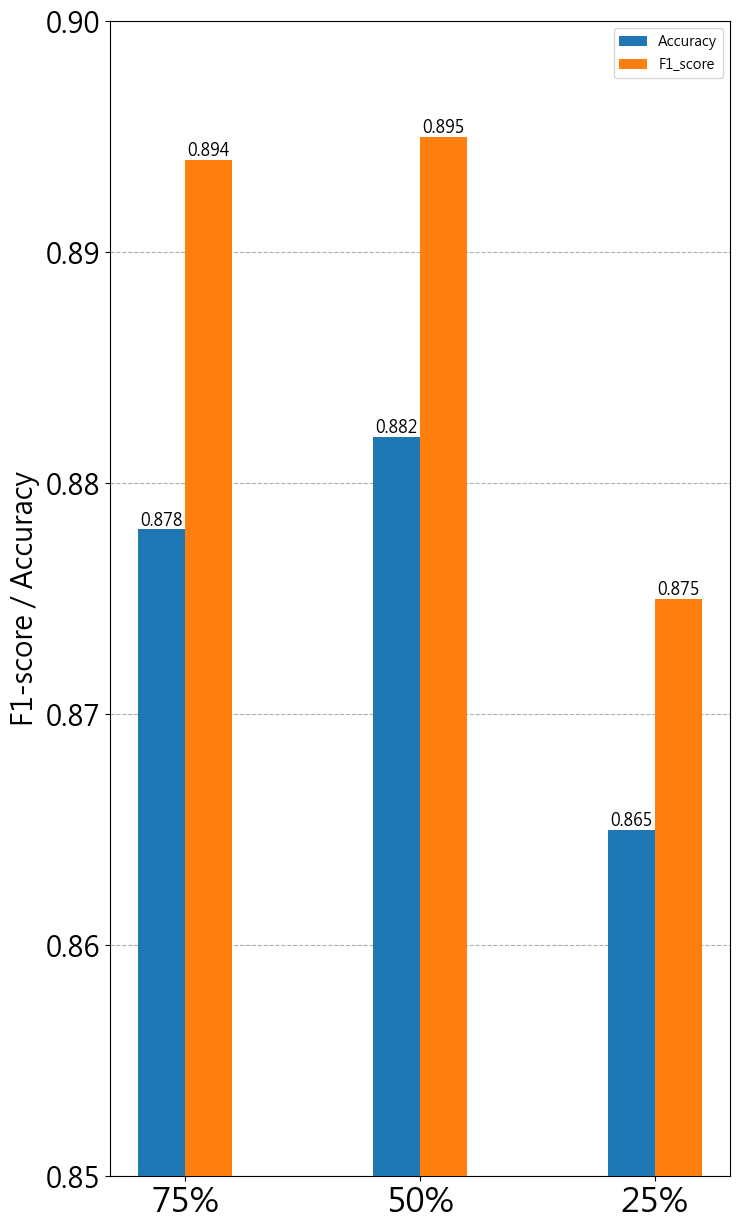

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rc('font', family='Microsoft JhengHei')
# 建立資料
categories = ['75%', '50%', '25%']
# Accuracy = [0.773, 0.804, 0.75]
# F1_score = [0.725, 0.755, 0.691]
Accuracy = [0.878, 0.882, 0.865]
F1_score = [0.894, 0.895, 0.875]
# 設置圖表寬度
bar_width = 0.2
index = np.arange(len(categories))
plt.figure(figsize=(8, 15))

# 繪製分組長條圖
bars1 = plt.bar(index, Accuracy, bar_width, label='Accuracy', zorder=10)
bars2 = plt.bar(index + bar_width, F1_score, bar_width, label='F1_score', zorder=10)

# 在每個長條圖上顯示值
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.3f}'.format(height), ha='center', va='bottom', fontsize=12)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.3f}'.format(height), ha='center', va='bottom', fontsize=12)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.ylim(0.85, 0.9)
plt.ylabel('F1-score / Accuracy', fontsize=20)
plt.xticks(index + bar_width / 2, categories,fontsize=24)
plt.legend()
# plt.title('三種模型在注音辨識對準確率與F1-score', fontsize=20)

# 繪製格子，並設置zorder
plt.grid(True, axis='y',linestyle='--', zorder=0)

plt.show()


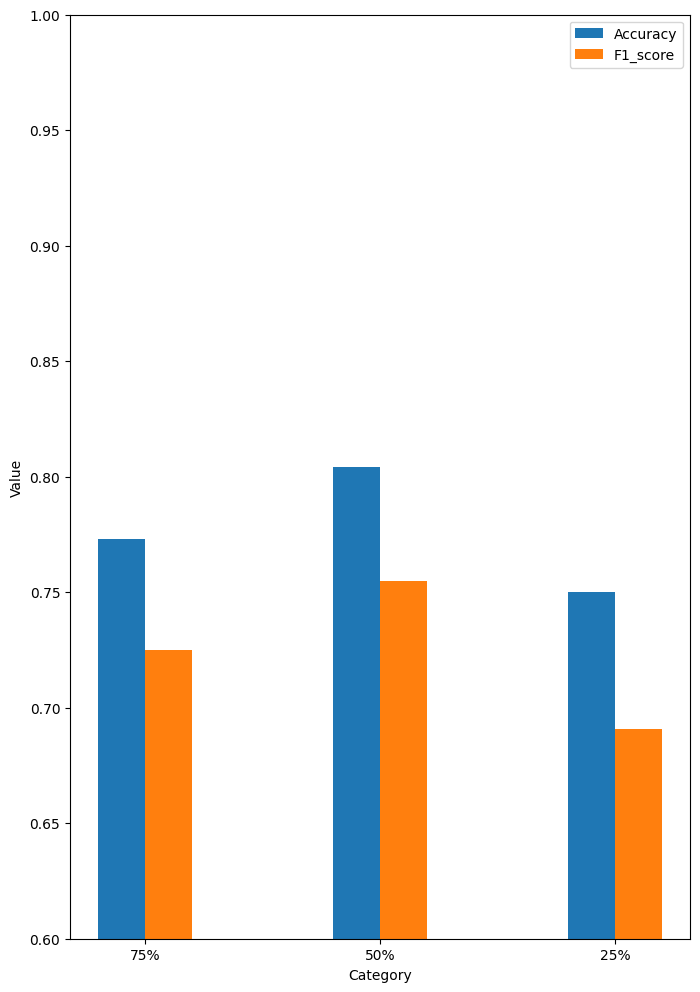

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# 建立資料
categories = ['75%', '50%', '25%']
Accuracy = [0.773, 0.804, 0.75]
F1_score = [0.725, 0.755, 0.691]
# 設置圖表寬度
bar_width = 0.2
index = np.arange(len(categories))
plt.figure(figsize=(8, 12))
# 繪製分組長條圖
plt.bar(index, Accuracy, bar_width, label='Accuracy')
plt.bar(index + bar_width, F1_score, bar_width, label='F1_score')
plt.ylim(0.6, 1)
# 添加標籤和標題
plt.xlabel('Category')
plt.ylabel('Value')
plt.xticks(index + bar_width / 2, categories)
plt.legend()

# 顯示圖表
plt.show()

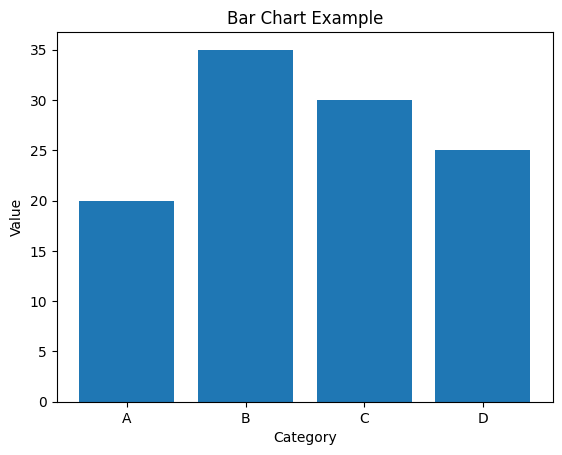

In [6]:
import matplotlib.pyplot as plt

# 建立資料
categories = ['A', 'B', 'C', 'D']
values = [20, 35, 30, 25]

# 繪製長條圖
plt.bar(categories, values)

# 設置x軸和y軸上的刻度
plt.xticks(range(len(categories)), categories)
plt.yticks(range(0, max(values)+1, 5))

# 添加標籤和標題
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Bar Chart Example')

# 顯示圖表
plt.show()
